# Assignment 4

Name    : Vaishnavi Sandeep Dhadiwal<br>
Class   : TE11<br>
Batch   : L11<br>
Roll no.: 33314<br>
Course  : 314448 Laboratory Practice-I (Machine Learning)<br>


<i><b>Assignment on Clustering Techniques</b><br>
Download the following customer dataset from below link:<br>
Data Set: https://www.kaggle.com/shwetabh123/mall-customers<br>
This dataset gives the data of Income and money spent by the customers visiting a Shopping Mall.<br> The data set contains Customer ID, Gender, Age, Annual Income, Spending Score. <br>
Therefore, as a mall owner you need to find the group of people who are the profitable customers for the mall owner.<br> Apply at least two clustering algorithms (based on Spending Score) to find the group of customers.<br>
a. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary.<br>
b. Perform data-preparation( Train-Test Split)
Mall_Customers<br>
c. Apply Machine Learning Algorithm<br>
d. Evaluate Model.<br>
e. Apply Cross-Validation and Evaluate Model<br></i>



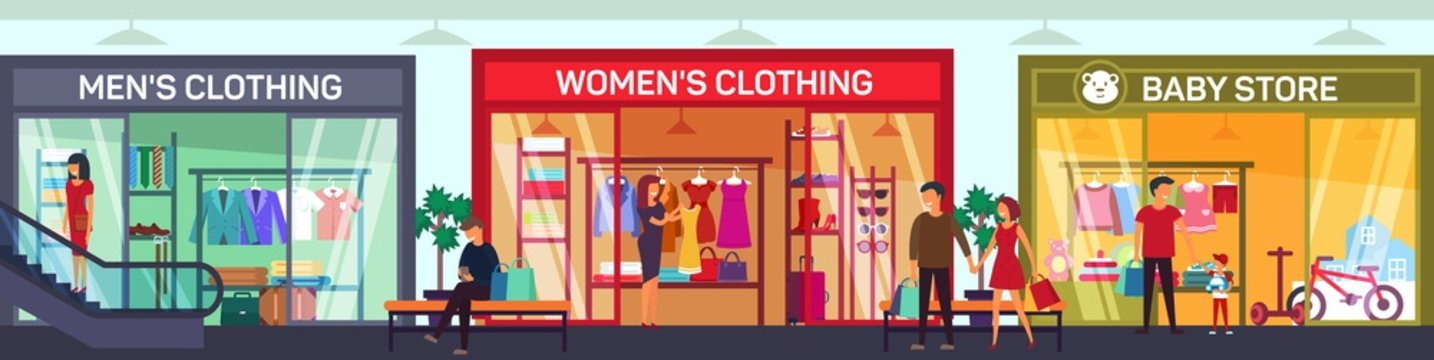

Important references :<br>
https://inblog.in/K-means-Clustering-Algorithm-Applications-Model-Building-NHXY7XUDBn

http://education.abcom.com/mall-customer-segmentation/

https://medium.com/analytics-vidhya/mall-customers-cluster-analysis-b2ece6effdaa

https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

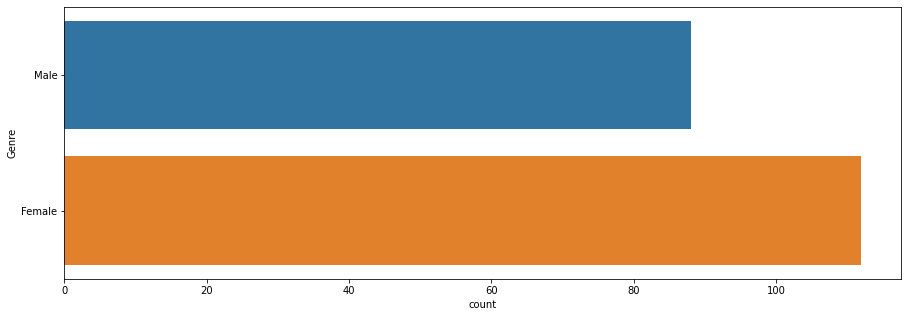

In [ ]:
#lets find which gender visits the mall most
plt.figure(1,(15,5))
sns.countplot(y="Genre",data=df)
plt.show()

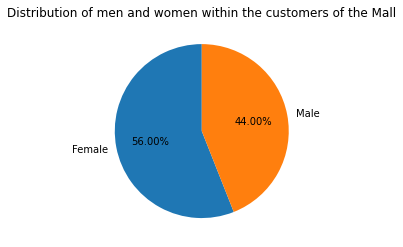

In [ ]:
#to make a piechart:
gender=df.Genre.value_counts()
gender_label=['Female','Male']
plt.pie(gender, labels=gender_label, autopct='%0.2f%%',startangle=90)
plt.title('Distribution of men and women within the customers of the Mall')
plt.show()

Text(0.5, 1.0, 'Age distribution of customers')

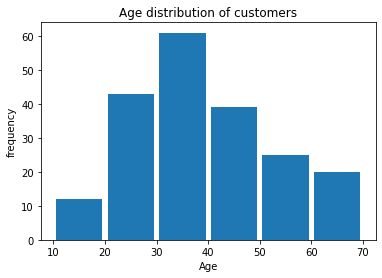

In [ ]:
bin_list=[10,20,30,40,50,60,70]
plt.hist(df['Age'], bins=bin_list, rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Age distribution of customers')

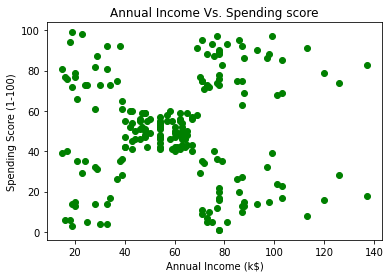

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c="green")
plt.title("Annual Income Vs. Spending score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

**Data Preprocessing**

In [ ]:
#let's also drop the customer ID because it's not important
df.drop("CustomerID", axis = 1, inplace=True)

In [ ]:
#Applying one-hot encoding on Gender.
df["Genre"].replace("Male", 0, inplace=True)
df["Genre"].replace("Female", 1, inplace=True)
df.dtypes

Genre                     int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

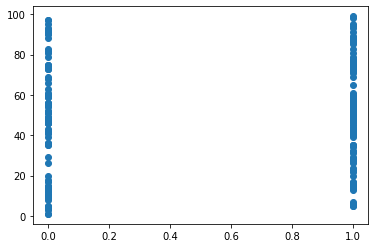

In [ ]:
plt.scatter(df['Genre'], df['Spending Score (1-100)'])

**K- Means** 

In [ ]:
#spiltting of data

X=df[['Annual Income (k$)','Spending Score (1-100)']].values

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
#Let's see where is the location of the centers
centroids=kmeans.cluster_centers_
centroids

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636]])

Text(0, 0.5, 'Y')

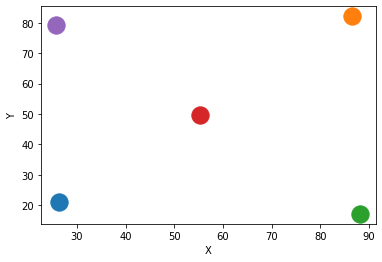

In [ ]:
for i in centroids:
  plt.scatter(i[0],i[1],s = 300)
plt.xlabel('X')
plt.ylabel('Y')

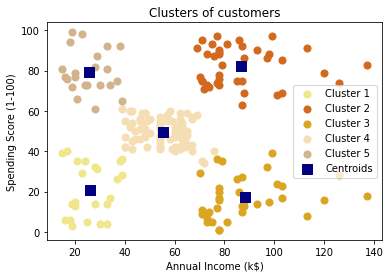

In [ ]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'khaki', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'chocolate', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'goldenrod', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'wheat', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'tan', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'navy', label = 'Centroids',marker='s')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Cluster 1 (Red Color) -> earning high but spending less

cluster 2 (Blue Color) -> average in terms of earning and spending

cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]

cluster 4 (cyan Color) -> earning less but spending more

Cluster 5 (magenta Color) -> Earning less , spending less

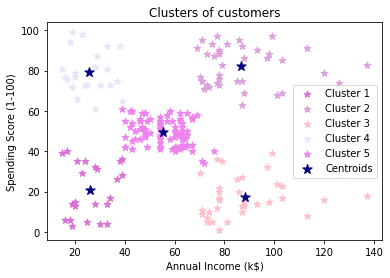

In [ ]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'orchid', label = 'Cluster 1',marker='*')#center
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'plum', label = 'Cluster 2',marker='*')#right top
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'pink', label = 'Cluster 3',marker='*')#left top
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'lavender', label = 'Cluster 4',marker='*')#right bottom
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'violet', label = 'Cluster 5',marker='*')#left bottom
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'navy', label = 'Centroids',marker='*')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Elbow method

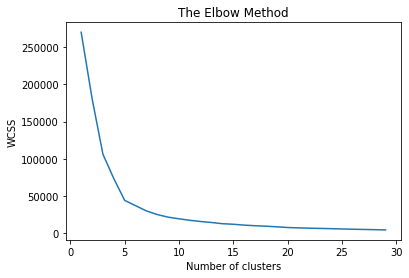

In [ ]:
#WCSS is the sum of squared distance between each point and the centroid in a cluster.
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Thus, we can say that k=5 is the best possible number of clusters

<h2><u> Hierarchical Clustering</u> </h2>

Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.<br>
In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.<br>
The hierarchical clustering technique has two approaches:<br>
  - Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.<br>
  - Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.<br>

In [ ]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [ ]:
x=df[['Annual Income (k$)','Spending Score (1-100)']].values

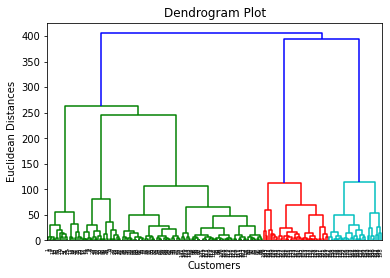

In [ ]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc 
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogram Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()  

 The AgglomerativeClustering class takes the following parameters:

  - n_clusters=5: It defines the number of clusters, and we have taken here 5 because it is the optimal number of clusters.<br>
  - affinity='euclidean': It is a metric used to compute the linkage.<br>
  - linkage='ward': It defines the linkage criteria, here we have used the "ward" linkage.This method is the popular linkage method that we have already used for creating the Dendrogram. It reduces the variance in each cluster.<br>

In the last line, we have created the dependent variable y_pred to fit or train the model. It does train not only the model but also returns the clusters to which each data point belongs.

In [ ]:
#import the AgglomerativeClustering class of cluster module of scikit learn library.
from sklearn.cluster import AgglomerativeClustering 
#training the hierarchical model on dataset 
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x) 

Visualizing the clusters

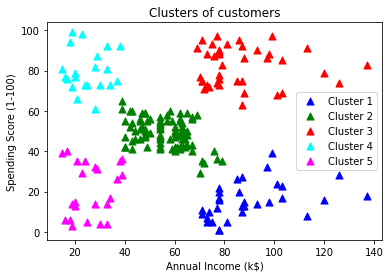

In [ ]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 50, c = 'blue', label = 'Cluster 1',marker='^')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 50, c = 'green', label = 'Cluster 2',marker='^')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 50, c = 'red', label = 'Cluster 3',marker='^')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4',marker='^')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5',marker='^')  
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

In [ ]:
df.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df.head(5)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [ ]:
#from sklearn.model_selection import train_test_split
#train, validation = train_test_split(df, test_size=0.50, random_state = 5)

In [ ]:
from sklearn.model_selection import KFold 
kfold = KFold(5, True, 1)

In [ ]:
# enumerate splits
for train, test in kfold.split(df):
	print('train: %s, test: %s' % (train, test))

train: [  0   1   2   3   5   6   7   8   9  10  12  13  14  15  17  19  20  21
  22  23  24  25  26  30  32  33  36  37  39  41  42  43  45  46  48  49
  50  52  53  54  55  56  57  60  61  62  63  64  65  66  67  68  70  71
  72  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  90  91
  92  93  96  98  99 100 101 103 104 105 106 107 108 109 111 112 113 114
 115 116 117 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 160 161 163 164 166 167 169 170 173 175 178 179
 180 181 182 183 185 186 187 188 189 190 191 192 195 196 197 199], test: [  4  11  16  18  27  28  29  31  34  35  38  40  44  47  51  58  59  69
  73  89  94  95  97 102 110 118 136 159 162 165 168 171 172 174 176 177
 184 193 194 198]
train: [  0   1   2   3   4   6   7   8   9  10  11  13  15  16  18  20  21  22
  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  40  41  43
  44  45  46  47  4